# Make the splits for task 1 (protein extrapolation)

For this set we want to perform enzyme classification and make training and testing for different levels of challenge.

### Task A: Predicting easily misclassified enzymes
Here we aim to use the Price et al, dataset which includes 149 enzymes which were challenging to discern the activity of (Mutant phenotypes for thousands of bacterial genes of unknown function). 

### Task B: Predicting Promiscuous enzymes
Being able to classify enzymes that are able to catalyse multiple reactions remains a challenge, so we test these separately. 

### Task C: Predicting enzymes with low sequence identity 
Given many enzymes share high sequence similarity, we sought to investigate the efficacy of each method using sequnces with 30 and 50% siumilarity.

### Lastly check the sequence identity using blast for each one in the train and test

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
swissprot = pd.read_csv('../processed_data/protein2EC.csv')

subunit_df = pd.read_csv('raw_data/subunit.tsv', sep='\t')
#dropna for "Subunit structure" column
subunit_df = subunit_df.dropna(subset=['Subunit structure'])

#make a dictionary mapping entry  to Subunit structure
subunit_mapping = dict(zip(subunit_df['Entry'], subunit_df['Subunit structure']))
swissprot['Subunit'] = swissprot['Entry'].map(subunit_mapping)

swissprot

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes30,clusterRes50,clusterRes70,clusterRes90,EC3,EC2,EC1,Subunit
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.6,A1AY86,A0A009IHW8,A0A009IHW8,A0A009IHW8,3.2.2,3.2,3,SUBUNIT: Homodimer. In the presence of NAD(+) ...
1,A0A023I7E1,ENG1_RHIMI,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,3.2.1.39,796,3.2.1.39,D4AZ24,A0A023I7E1,A0A023I7E1,A0A023I7E1,3.2.1,3.2,3,NaN
2,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,3.1.1.74,A8QPD8,A8QPD8,A8QPD8,A0A024SC78,3.1.1,3.1,3,NaN
3,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,3.2.1.91,B2AE04,A1CCN4,A0A024SH76,A0A024SH76,3.2.1,3.2,3,NaN
4,A0A044RE18,BLI_ONCVO,MYWQLVRILVLFDCLQKILAIEHDSICIADVDDACPEPSHTVMRLR...,3.4.21.75,693,3.4.21.75,Q9VBC7,A0A044RE18,A0A044RE18,A0A044RE18,3.4.21,3.4,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185990,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,4.1.1.76,Q05115,Q05115,Q05115,Q05115,4.1.1,4.1,4,NaN
185991,Q6HX62,Y3032_BACAN,MGQNQFRWSNEQLREHVEIIDGTRSPHKLLKNATYLNSYIREWMQA...,3.5.4.2,584,3.5.4.2,Q9KF49,Q6HX62,Q6HX62,Q6HX62,3.5.4,3.5,3,NaN
185992,Q6L032,Y1085_PICTO,MLLKNIKISNDYNIFMIIASRKPSLKDIYKIIKVSKFDEPADLIIE...,3.5.4.2,573,3.5.4.2,Q9KF49,Q6L032,Q6L032,Q6L032,3.5.4,3.5,3,NaN
185993,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,3.6.1.12,P39262,P39262,Q94MV8,Q94MV8,3.6.1,3.6,3,NaN


In [3]:
swissprot['EC1'].nunique()
swissprot['EC2'].nunique()
swissprot['EC3'].nunique()
swissprot['EC number'].nunique()

4960

In [4]:
### Also make a clustered version of the training set at 50% sequence identity, for training and to reduce the number of the samples to extract

np.random.seed(42)
random.seed(42)
swissprot50 = swissprot.groupby('clusterRes50').sample(1)

print(len(swissprot50))

missing = swissprot[~swissprot['EC number'].isin(swissprot50['EC number'])]
np.random.seed(42)
random.seed(42)

missing = missing.groupby('EC number').sample(1)
print(len(missing))

swissprot50 = pd.concat([swissprot50, missing])
swissprot50

swissprot50.iloc[:,:-6].to_csv('../processed_data/protein2EC_clustered50.csv', index=False)

28632
695


## Task A: challenging enzymes

The price dataset was downloaded from: https://github.com/tttianhao/CLEAN/blob/main/app/data/price.fasta

In [5]:
max_len = 1024
price = pd.read_csv('raw_data/price.tsv', sep='\t')
#remove sequences in price that are in swissprot
price = price[~price['Sequence'].isin(swissprot['Sequence'])]
price['Length'] = price['Sequence'].apply(len)
price = price[price['Length'] > 100]
price = price[price['Length'] < max_len]
price.to_csv('../splits/task1/price_protein_test.csv', index=False)
price

,Entry,EC number,Sequence,Length
0,WP_063460136,5.3.1.7,MAIPPYPDFRSAAFLRQHLRATMAFYDPVATDASGGQFHFFLDDGT...,424
1,WP_063462980,4.2.1.43,VPTTFHEDGTLDLDSQKRCLDFMIDAGVDGVCILANFSEQFSLSDA...,294
2,WP_063462990,1.1.1.48,LIDCNIDMTQLFAPSSSSTDATGAPQGLAKFPSLQGRAVFVTGGGS...,280
3,WP_041412631,4.2.1.25,MCLGRRRCHMNNKKPKTLRSASWFGSDDKNGFMYRSWMKNQGIPEH...,586
4,WP_011717048,5.1.3.3,MQLSVTQKSLQHAAFADELQLVTLTNSHGLEVVLSNYGASIWSVKL...,351
...,...,...,...,...
144,WP_010207013,1.3.8.7,MADYKAPLRDMRFVLNEVFEVATTWAQLPALADTVDAETVEAILEE...,592
145,WP_010207016,1.3.8.7,MPDYKAPLRDIRFVRDELLGYEAHYQSLPACQDATPDMVDAILEEG...,601
146,WP_010207340,2.6.1.19,MSSNNPQTREWQALSSDHHLAPFSDFKQLKEKGPRIITKAHGVYLW...,454
147,WP_010207341,6.3.1.11,MSVPPRAVQLNEANAFLKDHPEVLYVDLLIADMNGVVRGKRIERTS...,458


## Task 2: Selecting low sequence identity proteins

We test two levels of sequnece identity: < 30% and 30-50%.

In [6]:
swissprot['clusterRes50'].value_counts()

clusterRes50
B2UZK0    810
Q2RGU9    666
Q1D345    624
B2URY4    608
B8J444    559
         ... 
E8R1E4      1
E8UEF9      1
E8W6C7      1
E9ENC6      1
Q9J5H2      1
Name: count, Length: 28632, dtype: int64

In [7]:
swissprot['clusterRes30'].value_counts()

clusterRes30
B4U8W9    1350
Q313W4    1016
Q2JA12     838
B0T335     817
Q9X0X6     788
          ... 
Q53H47       1
Q53692       1
O10274       1
O13629       1
Q9J5H2       1
Name: count, Length: 10057, dtype: int64

## Make a very hard set of sequences which have no entries that are < 30% identity

In [8]:
#swissprot['Duplicated clusterRes30'] = swissprot['clusterRes30'].duplicated(keep=False)
#swissprot['Duplicated clusterRes50'] = swissprot['clusterRes50'].duplicated(keep=False)
swissprot['members clusterRes30'] = swissprot['clusterRes30'].map(swissprot['clusterRes30'].value_counts())
swissprot['members clusterRes50'] = swissprot['clusterRes50'].map(swissprot['clusterRes50'].value_counts())

swissprot['Duplicated EC'] = swissprot['EC number'].duplicated(keep=False)
swissprot['Promiscuous'] = swissprot['Sequence'].duplicated(keep=False)
not_promiscuous = swissprot[~swissprot['Promiscuous']]

In [9]:
max_samples = 3 #number of clusters to remove from each EC at level 3

Text(0.5, 1.0, 'EC counts per EC3')

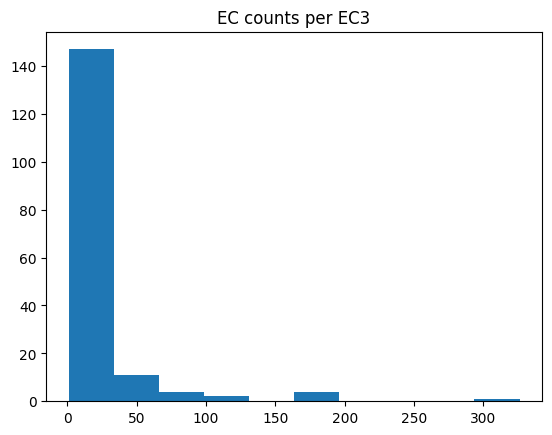

In [10]:
from sciutil import SciUtil
import matplotlib.pyplot as plt

u = SciUtil()

np.random.seed(42)
random.seed(42)

train_isolated30 = not_promiscuous[not_promiscuous['members clusterRes30'] == 1]
train_isolated30 = train_isolated30[train_isolated30['Duplicated EC'] == True]

# Make a validation set that is completely held out.

#sample a random one from each unique EC at level 3 for validation (i.e. not in training or the larger test set)
validation_30 = pd.DataFrame()

ec_counts  = []
for g, v in train_isolated30.groupby('EC3'):
    num_samples = min(max_samples, len(v))
    validation_30 = pd.concat([validation_30, v.sample(num_samples)])
    ec_counts.append(len(v))
    
# u.dp(['EC 3 numbers:', 'All:', len(ec_counts), 'A single sample:', len([c for c in ec_counts if c == 1]), 'two samples:', len([c for c in ec_counts if c == 2])])

# u.dp(['Training: ', len(train_isolated30), 'Validation:', len(validation_30)])

plt.hist(ec_counts)
plt.title('EC counts per EC3')

In [11]:
#remove validation_30 from not_promiscuous
not_promiscuous = not_promiscuous[~not_promiscuous['Entry'].isin(validation_30['Entry'])]
not_promiscuous['Duplicated EC'] = not_promiscuous['EC number'].duplicated(keep=False)

In [12]:
validation_30

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes30,clusterRes50,clusterRes70,clusterRes90,EC3,EC2,EC1,Subunit,members clusterRes30,members clusterRes50,Duplicated EC,Promiscuous
83208,O32178,FADN_BACSU,MHKHIRKAAVLGSGVMGSGIAAHLANIGIPVLLLDIVPNDLTKEEE...,1.1.1.35,789,1.1.1.35,O32178,O32178,O32178,O32178,1.1.1,1.1,1,NaN,1,1,True,False
27177,P40580,BZRD_YEAST,MGKVILITGASRGIGLQLVKTVIEEDDECIVYGVARTEAGLQSLQR...,1.1.1.320,263,1.1.1.320,P40580,P40580,P40580,P40580,1.1.1,1.1,1,NaN,1,1,True,False
25240,P05707,SRLD_ECOLI,MNQVAVVIGGGQTLGAFLCHGLAAEGYRVAVVDIQSDKAANVAQEI...,1.1.1.140,259,1.1.1.140,P05707,P05707,P05707,P05707,1.1.1,1.1,1,SUBUNIT: Homotetramer. {ECO:0000269|PubMed:638...,1,1,True,False
26689,P29898,DHM2_PARDE,MKRILTLTVAALALGTPALAYDGTNCKAPGNCWEPKPDYPAKVEGS...,1.1.2.7,103,1.1.2.7,P29898,P29898,P29898,P29898,1.1.2,1.1,1,SUBUNIT: Heterotetramer composed of 2 alpha an...,1,1,True,False
19801,A0A075HNX4,LCAO_UNCAR,MAQGAQRKNFGHNQILRPSAAYTPVDEQEVLQILDRHRGQRIRAVG...,1.1.3.20,479,1.1.3.20,A0A075HNX4,A0A075HNX4,A0A075HNX4,A0A075HNX4,1.1.3,1.1,1,NaN,1,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117563,Q5WCL2,TAGH_SHOC1,MNPKMILTGVSKKYTLYRNNTEKLKAMFFPKTREQHRDFYALKDIN...,7.5.2.4,360,7.5.2.4,Q5WCL2,Q5WCL2,Q5WCL2,Q5WCL2,7.5.2,7.5,7,SUBUNIT: The complex is composed of two ATP-bi...,1,1,True,False
108219,Q3JSI8,RBSA1_BURP1,MRASLENGDDHDAHRLVDAGFRPPGRPRAARRRAFARARRGERRAR...,7.5.2.7,859,7.5.2.7,Q3JSI8,Q3JSI8,Q3JSI8,Q3JSI8,7.5.2,7.5,7,SUBUNIT: The complex is composed of an ATP-bin...,1,1,True,False
82577,O21280,CCMA_RECAM,MNLTKIQNLTIHNITGIRSNKIIFQNINFSLEKGSLFIIQGSNGSG...,7.6.2.5,222,7.6.2.5,O21280,O21280,O21280,O21280,7.6.2,7.6,7,SUBUNIT: The complex is composed of two ATP-bi...,1,1,True,False
61503,B0R5G4,BTUDA_HALS3,MTLDVTGLDVELAGTRILDDVHASIRDGHLVGVVGPNGAGKSTLLR...,7.6.2.8,398,7.6.2.8,B0R5G4,B0R5G4,B0R5G4,B0R5G4,7.6.2,7.6,7,SUBUNIT: The complex is composed of two ATP-bi...,1,1,True,False


--------------------------------------------------------------------------------
          EC 3 numbers:	All:	203	A single sample:	17	two samples:	15	           
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                    Training set 50%: 	9387	Validation:	560	                    
--------------------------------------------------------------------------------


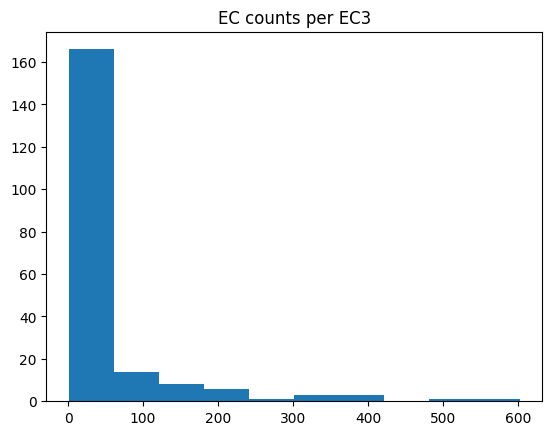

In [13]:
np.random.seed(42)
random.seed(42)

# Drop out the ones we picked from the train30 just to make sure we're getting a diverse set
train_isolated50 = not_promiscuous[not_promiscuous['members clusterRes50'] == 1]
train_isolated50 = train_isolated50[train_isolated50['Duplicated EC'] == True]

train_isolated50 = train_isolated50[~train_isolated50['Entry'].isin(train_isolated30['Entry'].values)]

# Make a validation set that is completely held out.
np.random.seed(42)
random.seed(42)

#sample a random N from each unique EC at level 3 for validation (i.e. not in training or the larger test set)
validation_50 = pd.DataFrame()

ec_counts  = []
for g, v in train_isolated50.groupby('EC3'):
    num_samples = min(max_samples, len(v))
    validation_50 = pd.concat([validation_50, v.sample(num_samples)])
    ec_counts.append(len(v))
    
u.dp(['EC 3 numbers:', 'All:', len(ec_counts), 'A single sample:', len([c for c in ec_counts if c == 1]), 'two samples:', len([c for c in ec_counts if c == 2])])

plt.hist(ec_counts)
plt.title('EC counts per EC3')

u.dp(['Training set 50%: ', len(train_isolated50), 'Validation:', len(validation_50)])

In [14]:
#remove validation_50 from not_promiscuous
not_promiscuous = not_promiscuous[~not_promiscuous['Entry'].isin(validation_50['Entry'])]
not_promiscuous['Duplicated EC'] = not_promiscuous['EC number'].duplicated(keep=False)

In [15]:
# np.random.seed(42)
# random.seed(42)

# # Drop out the ones we picked from the train30 just to make sure we're getting a diverse set
# train_isolated70 = not_promiscuous[not_promiscuous['Duplicated clusterRes70'] == False]
# train_isolated70 = train_isolated70[train_isolated70['Duplicated EC'] == True]

# train_isolated70 = train_isolated70[~train_isolated70['Entry'].isin(train_isolated50['Entry'].values)]
# train_isolated70 = train_isolated70[~train_isolated70['Entry'].isin(train_isolated30['Entry'].values)]

# # Make a validation set that is completely held out.
# np.random.seed(42)
# random.seed(42)

# #sample a random N from each unique EC at level 3 for validation (i.e. not in training or the larger test set)
# validation_70 = pd.DataFrame()

# ec_counts  = []
# for g, v in train_isolated70.groupby('EC3'):
#     num_samples = min(max_samples, len(v))
#     validation_70 = pd.concat([validation_70, v.sample(num_samples)])
#     ec_counts.append(len(v))
    
# u.dp(['EC 3 numbers:', 'All:', len(ec_counts), 'A single sample:', len([c for c in ec_counts if c == 1]), 'two samples:', len([c for c in ec_counts if c == 2])])

# plt.hist(ec_counts)
# plt.title('EC counts per EC3')

# u.dp(['Training set 70%: ', len(train_isolated70), 'Validation:', len(validation_70)])

In [16]:
# np.random.seed(42)
# random.seed(42)

# train_isolated90 = not_promiscuous[not_promiscuous['Duplicated clusterRes90'] == False]
# train_isolated90 = train_isolated90[train_isolated90['Duplicated EC'] == True]

# print(len(train_isolated90))
# train_isolated90 = train_isolated90[~train_isolated90['Entry'].isin(train_isolated70['Entry'].values)]
# print(len(train_isolated90))
# train_isolated90 = train_isolated90[~train_isolated90['Entry'].isin(train_isolated30['Entry'].values)]
# print(len(train_isolated90))
# train_isolated90 = train_isolated90[~train_isolated90['Entry'].isin(train_isolated50['Entry'].values)]

# # Make a validation set that is completely held out.
# np.random.seed(42)
# random.seed(42)

# #sample a random one from each unique EC at level 3 for validation (i.e. not in training or the larger test set)
# #sample a random N from each unique EC at level 3 for validation (i.e. not in training or the larger test set)
# validation_90 = pd.DataFrame()

# ec_counts  = []
# for g, v in train_isolated90.groupby('EC3'):
#     num_samples = min(max_samples, len(v))
#     validation_90 = pd.concat([validation_90, v.sample(num_samples)])
#     ec_counts.append(len(v))
    
# u.dp(['EC 3 numbers:', 'All:', len(ec_counts), 'A single sample:', len([c for c in ec_counts if c == 1]), 'two samples:', len([c for c in ec_counts if c == 2])])

# plt.hist(ec_counts)
# plt.title('EC counts per EC3')

# u.dp(['Training set 90%: ', len(validation_90), 'Validation:', len(validation_90)])

## Task 3: Promiscuous enzymes

Here we want to look at the promiscuous enzymes and see how well they can be classfiied 


In [17]:
promiscuous = swissprot[swissprot['Promiscuous']]
# promiscuous = promiscuous[promiscuous['Duplicated clusterRes90'] == False] #prevent sequence identity from being too high, but then nothing comes out
promiscuous = promiscuous.groupby(['Entry', 'Sequence']).agg({'EC number': lambda x: list(x)}).reset_index()
promiscuous

,Entry,Sequence,EC number
0,A0A023GS28,MAPTKDFSTTTTNGAESWDDVADFVTKKGHGVKGLSERGIKTLPKP...,"[1.14.11.61, 1.14.11.62]"
1,A0A023GS29,MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPF...,"[1.14.11.61, 1.14.11.62]"
2,A0A061AE05,MLTPRDENNEGDAMPMLKKPRYSSLSGQSTNITYQEHTISREERAA...,"[2.7.1.25, 2.7.7.4]"
3,A0A061B0Q2,MFKPTRVLKSSQPILNSLPHAETVKMAYDLHLPKKTLHQNMNITSD...,"[2.3.1.268, 3.1.2.1]"
4,A0A068Q609,MALLTLFNQIWQEGQLQSSTSSFNIFLVPILCLSIFILFSLTRSSS...,"[1.14.14.44, 1.14.14.77]"
...,...,...,...
9701,W0T4A7,MLLAYTVRPSNWSFTRRAYSATARAFNQQKGLLPLPIKETVDMAYD...,"[2.3.1.268, 3.1.2.1]"
9702,W0W999,MAANGSQRPIIAFMSDLGTTDDSVAQCKGLMHSICPGVTVVDVCHS...,"[2.5.1.63, 2.5.1.94]"
9703,W5QJZ5,MAPTKDSVIHMGAESWDEISEFVTKKGHGVKGLSELGIKTLPKQFH...,"[1.14.11.61, 1.14.11.62]"
9704,W6HUT3,MSVSLSFAASATFGFRGGLGGFSRPAAAIKQWRCLPRIQCHSAEQS...,"[4.2.3.113, 4.2.3.114, 4.2.3.115, 4.2.3.15]"


In [18]:
def get_difference_level(predicted_ECs):
    counters = []

    for true_EC in predicted_ECs:

        #convert true_EC to a list
        if type(predicted_ECs) == str:
            predicted_ECs = [predicted_ECs]
        true_split = true_EC.split('.')

        for predicted in predicted_ECs:
            #print(true_EC)
            
            predicted_split = predicted.split('.')
            counter = 0
            for predicted, true in zip(predicted_split, true_split):
                if predicted == true:
                    counter += 1
                else:
                    break
            counters.append(4 - counter)

    return np.max(counters)

In [19]:
promiscuous['Surprise Level'] = promiscuous['EC number'].apply(get_difference_level)
promiscuous['Number of ECs'] = promiscuous['EC number'].apply(lambda x: len(x))
# Check if there are duplicates in terms of EC and sequence
promiscuous['Duplicated EC'] = promiscuous['EC number'].duplicated(keep=False)
promiscuous['Duplicated Sequence'] = promiscuous['Sequence'].duplicated(keep=False)
promiscuous = promiscuous.sort_values(['Duplicated EC', 'Surprise Level', 'Number of ECs'], ascending=False)
promiscuous

,Entry,Sequence,EC number,Surprise Level,Number of ECs,Duplicated EC,Duplicated Sequence
5325,Q1EG72,MAAPTLTTDGPRLGQQEMKKMSPSFHPTLWGDFFLSYEAPTEAQEA...,"[4.2.3.113, 4.2.3.15, 4.2.3.16, 4.2.3.25, 4.2....",4,6,True,False
6716,Q5GJ60,MAAPTLTADGPRLGQQEMKKMSPSFHPTLWGDFFLSYEAPTEAQEA...,"[4.2.3.113, 4.2.3.15, 4.2.3.16, 4.2.3.25, 4.2....",4,6,True,False
126,A0KEL1,MIYQGETLTVSYLEDGIAELRFDAPGSVNKLDRATLLSLSEAIAAL...,"[1.1.1.35, 4.2.1.17, 5.1.2.3, 5.3.3.8]",4,4,True,False
138,A0KR50,MIYQSPTIQVELLEDNIAKLCFNAPGSVNKFDRETLASLDAALDSI...,"[1.1.1.35, 4.2.1.17, 5.1.2.3, 5.3.3.8]",4,4,True,False
271,A1JIG4,MLYQSETLQLHWLENGIAELVFDAPGSVNKLDTQTVANLGEALVVL...,"[1.1.1.35, 4.2.1.17, 5.1.2.3, 5.3.3.8]",4,4,True,False
...,...,...,...,...,...,...,...
4715,P9WNX9,MPIATINPATGETVKTFTAATDDEVDAAIARAHRRFADYRQTSFAQ...,[1.2.1.79],0,1,False,True
5024,Q0KBD1,MPRFAANLSMMYNEHAFLDRFAAAAADGFRAVEFLFPYEHAAAELR...,[5.3.1.35],0,1,False,True
6212,Q44015,MPRFAANLSMMYNEHAFLDRFAAAAADGFRAVEFLFPYEHAAAELR...,[5.3.1.22],0,1,False,True
7584,Q72K55,MDYGMYFFEHVTPYETLVRRMERVIASGKTPFQDYFLFESKGFGKV...,[2.5.1.16],0,1,False,True


## Potentially remove duplicated sequneces for promiscous enzymes that have similar reactions

In [20]:
# Keep ones which have duplicated ECs so that there is a homolog in the training dataaste
promiscuous = promiscuous[promiscuous['Duplicated EC'] == True]
# Make a validation set that is completely held out.
np.random.seed(42)
random.seed(42)

# Make this so that we can just sample a single one
promiscuous['EC number'] = [';'.join(sorted(ecs)) for ecs in promiscuous['EC number']]

#sample a random one from each unique EC at level 3 for validation (i.e. not in training or the larger test set)
promiscuous = promiscuous.groupby('EC number').sample(1)
#promiscuous.drop_duplicates(subset='EC number', inplace=True)
promiscuous.reset_index(inplace=True)
promiscuous

/tmp/ipykernel_1204720/717349449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promiscuous['EC number'] = [';'.join(sorted(ecs)) for ecs in promiscuous['EC number']]


,index,Entry,Sequence,EC number,Surprise Level,Number of ECs,Duplicated EC,Duplicated Sequence
0,4686,P9WGT3,MTATATEGAKPPFVSRSVLVTGGNRGIGLAIAQRLAADGHKVAVTH...,1.1.1.100;1.1.1.36,1,2,True,False
1,7775,Q7TS56,MDKVCAVFGGSRGIGKAVAQLMAQKGYRLAIVARNLEVAKATASEL...,1.1.1.100;1.6.5.10,3,2,True,False
2,4907,Q09851,MEAEKFVLITGCSEGGIGNALALKFHQEGFQVLATARQVERMDNLT...,1.1.1.101;3.1.1.3,4,2,True,False
3,8401,Q8JZV9,MGRLDGKVIVLTAAAQGIGRASALAFAREGAKVIATDINESKLQEL...,1.1.1.104;1.1.1.30,1,2,True,False
4,9413,Q9R092,MWFYLVTLVGLYHLLRWYRERQVVSHLQDKYVFITGCDSGFGNLLA...,1.1.1.105;1.1.1.209;1.1.1.239;1.1.1.53;1.1.1.62,1,5,True,False
...,...,...,...,...,...,...,...,...
618,4255,P48445,MNVLVYNGPGTTPGSVKHAVESLRDFLEPYYAVSTVNVKVLQTEPW...,6.3.4.10;6.3.4.11;6.3.4.15;6.3.4.9,1,4,True,False
619,8570,Q8TUT7,MSDKVLVIGAGPNRIGQGIEFDYCTVHAVWAIQEEGYKAIIVNNNP...,6.3.4.16;6.3.5.5,2,2,True,False
620,9319,Q9M3H5,MEPATLTRSSSLTRFPYRRGLSTLRLARVNSFSILPPKTLLRQKPL...,7.2.2.12;7.2.2.21,1,2,True,False
621,4944,Q0B775,MQPDPNPAAAPAALIELTGVSKRFPGVQALDDCRFDLRAGEVHALM...,7.5.2.11;7.5.2.7,1,2,True,False


In [21]:
promiscuous = promiscuous[promiscuous['Duplicated EC']]
promiscuous['Subunit'] = promiscuous['Entry'].map(subunit_mapping)
promiscuous

,index,Entry,Sequence,EC number,Surprise Level,Number of ECs,Duplicated EC,Duplicated Sequence,Subunit
0,4686,P9WGT3,MTATATEGAKPPFVSRSVLVTGGNRGIGLAIAQRLAADGHKVAVTH...,1.1.1.100;1.1.1.36,1,2,True,False,"SUBUNIT: Homotetramer (PubMed:11932442, PubMed..."
1,7775,Q7TS56,MDKVCAVFGGSRGIGKAVAQLMAQKGYRLAIVARNLEVAKATASEL...,1.1.1.100;1.6.5.10,3,2,True,False,SUBUNIT: Homotetramer (in vitro). Heterotetram...
2,4907,Q09851,MEAEKFVLITGCSEGGIGNALALKFHQEGFQVLATARQVERMDNLT...,1.1.1.101;3.1.1.3,4,2,True,False,NaN
3,8401,Q8JZV9,MGRLDGKVIVLTAAAQGIGRASALAFAREGAKVIATDINESKLQEL...,1.1.1.104;1.1.1.30,1,2,True,False,SUBUNIT: Homotetramer. {ECO:0000250|UniProtKB:...
4,9413,Q9R092,MWFYLVTLVGLYHLLRWYRERQVVSHLQDKYVFITGCDSGFGNLLA...,1.1.1.105;1.1.1.209;1.1.1.239;1.1.1.53;1.1.1.62,1,5,True,False,NaN
...,...,...,...,...,...,...,...,...,...
618,4255,P48445,MNVLVYNGPGTTPGSVKHAVESLRDFLEPYYAVSTVNVKVLQTEPW...,6.3.4.10;6.3.4.11;6.3.4.15;6.3.4.9,1,4,True,False,SUBUNIT: Monomer. {ECO:0000250}.
619,8570,Q8TUT7,MSDKVLVIGAGPNRIGQGIEFDYCTVHAVWAIQEEGYKAIIVNNNP...,6.3.4.16;6.3.5.5,2,2,True,False,SUBUNIT: Composed of two chains; the small (or...
620,9319,Q9M3H5,MEPATLTRSSSLTRFPYRRGLSTLRLARVNSFSILPPKTLLRQKPL...,7.2.2.12;7.2.2.21,1,2,True,False,NaN
621,4944,Q0B775,MQPDPNPAAAPAALIELTGVSKRFPGVQALDDCRFDLRAGEVHALM...,7.5.2.11;7.5.2.7,1,2,True,False,NaN


In [22]:
#drop entries that are annotated as part of hetero multicomplex enzymes
promiscuous = promiscuous[~promiscuous["Subunit"].str.contains("Hetero", na=False)][~promiscuous["Subunit"].str.contains("hetero", na=False)]
promiscuous

/tmp/ipykernel_1204720/2542998471.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  promiscuous = promiscuous[~promiscuous["Subunit"].str.contains("Hetero", na=False)][~promiscuous["Subunit"].str.contains("hetero", na=False)]


,index,Entry,Sequence,EC number,Surprise Level,Number of ECs,Duplicated EC,Duplicated Sequence,Subunit
0,4686,P9WGT3,MTATATEGAKPPFVSRSVLVTGGNRGIGLAIAQRLAADGHKVAVTH...,1.1.1.100;1.1.1.36,1,2,True,False,"SUBUNIT: Homotetramer (PubMed:11932442, PubMed..."
2,4907,Q09851,MEAEKFVLITGCSEGGIGNALALKFHQEGFQVLATARQVERMDNLT...,1.1.1.101;3.1.1.3,4,2,True,False,NaN
3,8401,Q8JZV9,MGRLDGKVIVLTAAAQGIGRASALAFAREGAKVIATDINESKLQEL...,1.1.1.104;1.1.1.30,1,2,True,False,SUBUNIT: Homotetramer. {ECO:0000250|UniProtKB:...
4,9413,Q9R092,MWFYLVTLVGLYHLLRWYRERQVVSHLQDKYVFITGCDSGFGNLLA...,1.1.1.105;1.1.1.209;1.1.1.239;1.1.1.53;1.1.1.62,1,5,True,False,NaN
5,3283,O54909,MWLYLVALVGLWTLLRFFRVRQVVSHLQDKYVFITGCDSGFGTLLA...,1.1.1.105;1.1.1.209;1.1.1.315;1.1.1.53,1,4,True,False,SUBUNIT: Homodimer. {ECO:0000269|PubMed:162234...
...,...,...,...,...,...,...,...,...,...
617,3025,G8EWC8,MEKINVLVVGNGGREHALVWKLAQSPWAKHIFVAPGNGGFSKLENV...,6.3.3.1;6.3.4.13,2,2,True,False,NaN
618,4255,P48445,MNVLVYNGPGTTPGSVKHAVESLRDFLEPYYAVSTVNVKVLQTEPW...,6.3.4.10;6.3.4.11;6.3.4.15;6.3.4.9,1,4,True,False,SUBUNIT: Monomer. {ECO:0000250}.
620,9319,Q9M3H5,MEPATLTRSSSLTRFPYRRGLSTLRLARVNSFSILPPKTLLRQKPL...,7.2.2.12;7.2.2.21,1,2,True,False,NaN
621,4944,Q0B775,MQPDPNPAAAPAALIELTGVSKRFPGVQALDDCRFDLRAGEVHALM...,7.5.2.11;7.5.2.7,1,2,True,False,NaN


In [32]:
#no longer filter to only the most surprising
promiscuous = promiscuous[promiscuous['Surprise Level'] >= 2]

In [59]:
#count how many entries of subunit are not NA and dont contain Homo
#promiscuous_subset = promiscuous.dropna(subset="Subunit")
#promiscuous_subset = promiscuous_subset[~promiscuous_subset["Subunit"].str.contains("Homo")][~promiscuous_subset["Subunit"].str.contains("Monomer")][~promiscuous_subset["Subunit"].str.contains("homo")]
#promiscuous_subset

## Create a training dataset that doesn't include any of our proteins for validation

Check for the sequences before we can use them for training.

In [33]:
test_pooled_seqs = pd.concat([validation_30, validation_50, price, promiscuous])['Sequence'].unique()
len(test_pooled_seqs)

1349

In [34]:
#remove from the training set
train_swissprot = swissprot[~swissprot['Sequence'].isin(test_pooled_seqs)]
train_swissprot

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes30,clusterRes50,clusterRes70,clusterRes90,EC3,EC2,EC1,Subunit,members clusterRes30,members clusterRes50,Duplicated EC,Promiscuous
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.6,A1AY86,A0A009IHW8,A0A009IHW8,A0A009IHW8,3.2.2,3.2,3,SUBUNIT: Homodimer. In the presence of NAD(+) ...,5,1,True,False
1,A0A023I7E1,ENG1_RHIMI,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,3.2.1.39,796,3.2.1.39,D4AZ24,A0A023I7E1,A0A023I7E1,A0A023I7E1,3.2.1,3.2,3,NaN,2,1,True,False
2,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,3.1.1.74,A8QPD8,A8QPD8,A8QPD8,A0A024SC78,3.1.1,3.1,3,NaN,2,2,True,False
3,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,3.2.1.91,B2AE04,A1CCN4,A0A024SH76,A0A024SH76,3.2.1,3.2,3,NaN,15,12,True,False
4,A0A044RE18,BLI_ONCVO,MYWQLVRILVLFDCLQKILAIEHDSICIADVDDACPEPSHTVMRLR...,3.4.21.75,693,3.4.21.75,Q9VBC7,A0A044RE18,A0A044RE18,A0A044RE18,3.4.21,3.4,3,NaN,9,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185990,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,4.1.1.76,Q05115,Q05115,Q05115,Q05115,4.1.1,4.1,4,NaN,1,1,False,False
185991,Q6HX62,Y3032_BACAN,MGQNQFRWSNEQLREHVEIIDGTRSPHKLLKNATYLNSYIREWMQA...,3.5.4.2,584,3.5.4.2,Q9KF49,Q6HX62,Q6HX62,Q6HX62,3.5.4,3.5,3,NaN,6,2,True,False
185992,Q6L032,Y1085_PICTO,MLLKNIKISNDYNIFMIIASRKPSLKDIYKIIKVSKFDEPADLIIE...,3.5.4.2,573,3.5.4.2,Q9KF49,Q6L032,Q6L032,Q6L032,3.5.4,3.5,3,NaN,6,1,True,False
185993,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,3.6.1.12,P39262,P39262,Q94MV8,Q94MV8,3.6.1,3.6,3,NaN,2,2,True,False


In [35]:
#save all of the generated splits
train_swissprot.iloc[:,:-5].to_csv('../splits/task1/protein_train.csv')
validation_30.iloc[:,:-5].to_csv('../splits/task1/30_protein_test.csv', index=False)
validation_50.iloc[:,:-5].to_csv('../splits/task1/30-50_protein_test.csv', index=False)
price.to_csv('../splits/task1/price_protein_test.csv', index=False)
promiscuous.to_csv('../splits/task1/promiscuous_protein_test.csv', index=False)

#print the length of every saved file
for split in [train_swissprot, validation_30, validation_50, price, promiscuous]: #validation_70, validation_90, 
    print(len(split))

184529
432
560
148
209


### This one is for CLEAN training

In [36]:
#also save one at 50% clustering
np.random.seed(42)
random.seed(42)

#get one from each cluster but make sure all EC numbers are represented
train_swissprot50 = train_swissprot.groupby('clusterRes50').sample(1)
#for the EC numbers that are missing, add them back in
missing = train_swissprot[~train_swissprot['EC number'].isin(train_swissprot50['EC number'])]
np.random.seed(42)
random.seed(42)

missing = missing.groupby('EC number').sample(1)
train_swissprot50 = pd.concat([train_swissprot50, missing])
train_swissprot50

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes30,clusterRes50,clusterRes70,clusterRes90,EC3,EC2,EC1,Subunit,members clusterRes30,members clusterRes50,Duplicated EC,Promiscuous
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.6,A1AY86,A0A009IHW8,A0A009IHW8,A0A009IHW8,3.2.2,3.2,3,SUBUNIT: Homodimer. In the presence of NAD(+) ...,5,1,True,False
1,A0A023I7E1,ENG1_RHIMI,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,3.2.1.39,796,3.2.1.39,D4AZ24,A0A023I7E1,A0A023I7E1,A0A023I7E1,3.2.1,3.2,3,NaN,2,1,True,False
37804,A0A023VXA2,GUN_MAREN,MPRMLAASAAIIATTLAPLSAQAAGCEMTLHGINLSGAEFGQPGDP...,3.2.1.4,349,3.2.1.4,A1DME8,A0A023VXA2,A0A023VXA2,A0A023VXA2,3.2.1,3.2,3,NaN,12,1,True,False
19787,A0A024SH20,GUN2_HYPJR,MNKSVAPLLLAASILYGGAAAQQTVWGQCGGIGWSGPTNCAPGSAC...,3.2.1.4,418,3.2.1.4,A0A024SH20,A0A024SH20,A0A024SH20,A0A024SH20,3.2.1,3.2,3,NaN,2,2,True,False
19788,A0A024SMV2,XDH_HYPJR,MASGNPYTLKWGIMATGGIAETFCKDLLCNPAIRGADDVRHEIVAV...,1.1.1.179,391,1.1.1.179,Q9TV68,A0A024SMV2,A0A024SMV2,A0A024SMV2,1.1.1,1.1,1,NaN,22,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6298,P26458,APPB_ECOLI,MFDYETLRFIWWLLIGVILVVFMISDGFDMGIGCLLPLVARNDDER...,7.1.1.3,378,7.1.1.3,P0ABK2,P26458,P26458,P26458,7.1.1,7.1,7,SUBUNIT: Heterodimer of subunits I and II. {EC...,3,2,True,False
27561,P50000,ATPA_ACEWD,MNLRPEEISQIIKNEIERYEDKLEVVDVGTVIQVGDGVARVHGLEN...,7.2.2.1,502,7.2.2.1,Q0TNC2,Q05FY3,P50000,P50000,7.2.2,7.2,7,"SUBUNIT: F-type ATPases have 2 components, CF(...",459,523,True,False
83687,O54031,MMDB_PROMO,MLQAILDFYHSTGFYGLNMGSIIMMLVACVFLYLAIAKEFEPLLLV...,7.2.4.3,395,7.2.4.3,O54031,O54031,O54031,O54031,7.2.4,7.2,7,SUBUNIT: The methylmalonyl-CoA decarboxylase i...,12,11,True,False
7235,P37774,TCYN_ECOLI,MSAIEVKNLVKKFHGQTVLHGIDLEVKPGEVVAIIGPSGSGKTTLL...,7.4.2.12,250,7.4.2.12,Q5E882,P02915,P37774,P37774,7.4.2,7.4,7,SUBUNIT: The complex is composed of two ATP-bi...,429,5,False,False


In [37]:
train_swissprot50['EC number'].nunique()

4936

In [38]:
train_swissprot50.iloc[:,:-5].to_csv('../splits/task1/protein_train50.csv')

## Save fastas for diamond BLAST

In [39]:
def save_seqs_as_fasta(df, filename):
    with open(filename, 'w+') as fout:
        for entry, seq in df[['Entry', 'Sequence']].values:
            fout.write(f'>{entry}\n{seq}\n')

save_seqs_as_fasta(validation_30, f'fastas/validation_30.fasta')
save_seqs_as_fasta(validation_50, f'fastas/validation_50.fasta')
save_seqs_as_fasta(price, f'fastas/price.fasta')
save_seqs_as_fasta(promiscuous, f'fastas/promiscuous.fasta')

In [40]:
save_seqs_as_fasta(train_swissprot, f'fastas/train_swissprot.fasta')

In [41]:
#save indices of train_swissprot to txt
np.savetxt('../splits/task1/protein2EC_train_indices.txt', train_swissprot.index, fmt='%d')